In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import measureOC

,CH1,CH2,CH3,CH4,Time
1,-0.16,0.24,-4.96,6.56,0.00000
2,-0.28,0.28,-5.92,7.20,0.00005
3,-0.16,0.24,-5.28,6.56,0.00010
4,-0.28,0.32,-5.92,7.20,0.00015
5,-0.24,0.24,-5.28,6.88,0.00020
...,...,...,...,...,...
1196,-0.16,0.28,-5.44,6.72,0.05975
1197,-0.12,0.20,-4.80,6.72,0.05980
1198,-0.20,0.28,-5.60,7.36,0.05985
1199,-0.20,0.24,-4.96,7.20,0.05990


,CH1,CH2,CH3,CH4,Time
184,0.0,-0.16,5.12,-7.68,0.00915
185,0.0,-0.12,5.12,-7.04,0.00920
383,0.0,0.08,-3.84,7.68,0.01910
385,0.0,0.16,-4.00,7.68,0.01920
584,0.0,-0.08,5.12,-7.04,0.02915
585,0.0,-0.16,4.48,-7.68,0.02920
780,0.0,0.12,-4.48,7.04,0.03895
783,0.0,0.08,-3.84,7.68,0.03910
785,0.0,0.12,-4.00,7.04,0.03920
984,0.0,-0.12,5.12,-7.04,0.04915


,CH1,CH2,CH3,CH4,Time
130,-0.56,0.24,0.0,-5.92,0.00645
137,-0.56,0.20,0.0,-5.76,0.00680
332,0.48,-0.32,0.0,5.92,0.01655
334,0.56,-0.20,0.0,6.24,0.01665
341,0.44,-0.20,0.0,6.72,0.01700
530,-0.60,0.24,0.0,-5.12,0.02645
537,-0.56,0.20,0.0,-5.76,0.02680
732,0.48,-0.20,0.0,5.28,0.03655
734,0.48,-0.28,0.0,6.24,0.03665
741,0.40,-0.20,0.0,6.72,0.03700


0.019999999999999997
0.02
0.8482300164692442
Xl1 =  6.779850052429154
Rl1 =  5.9772418596560835
L1 =  0.021580932985318914


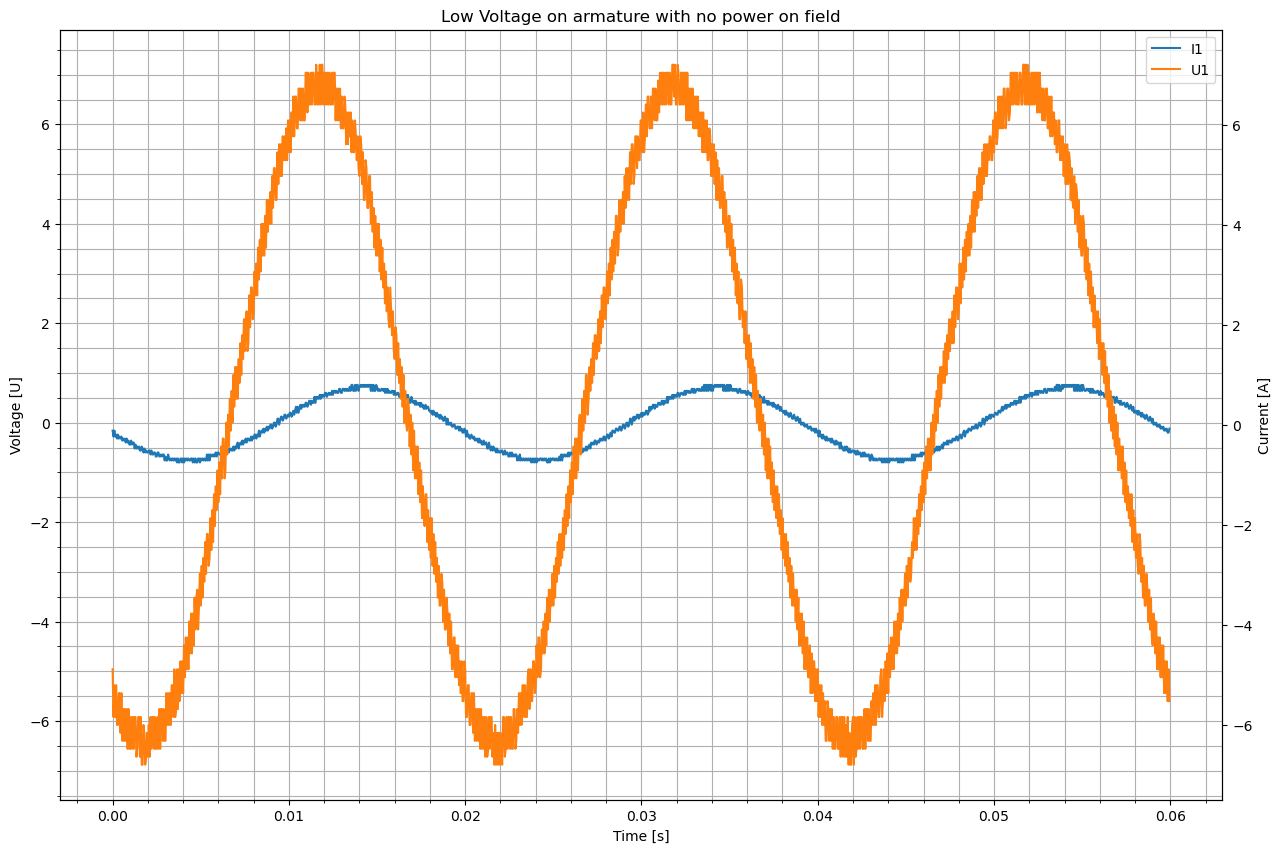

<Figure size 640x480 with 0 Axes>

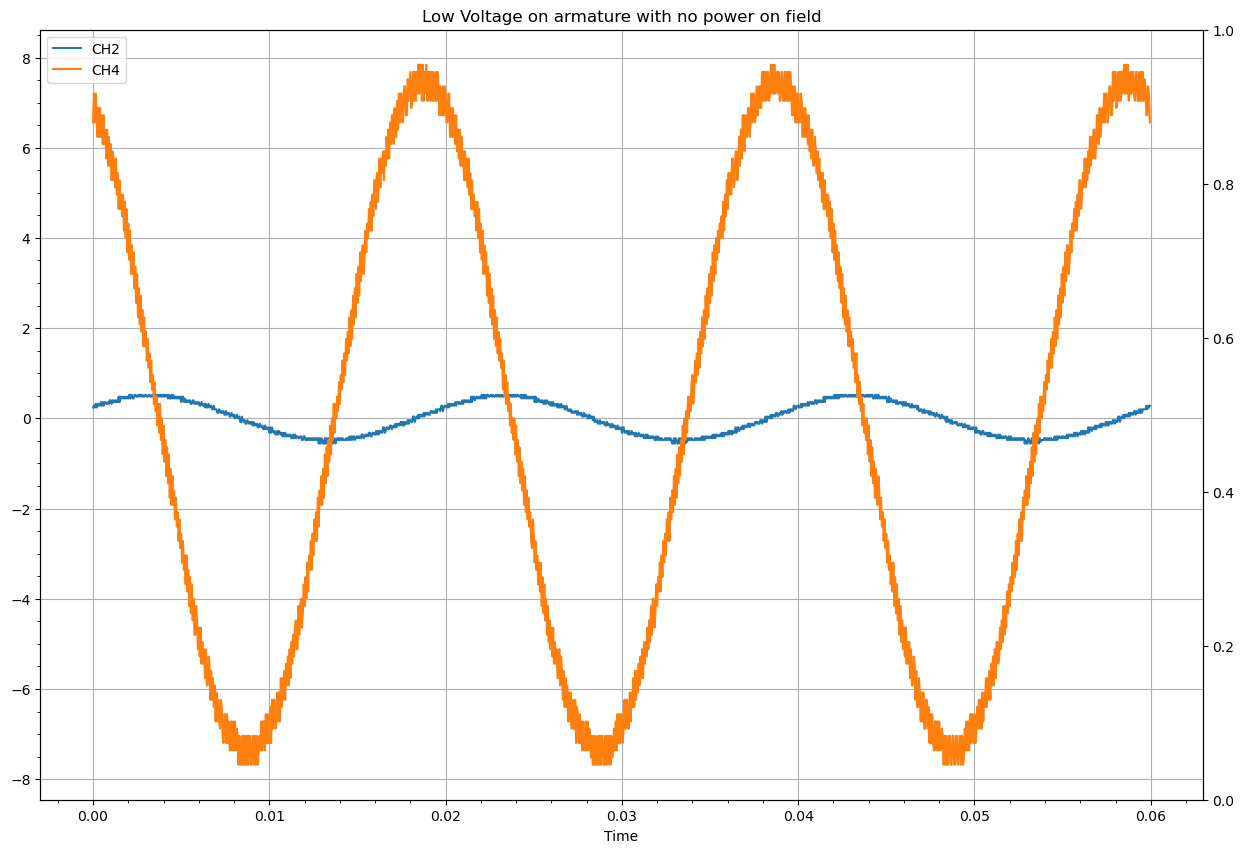

In [17]:
measurements = pd.read_csv('Data/lowVoltage.csv')

#compute time column
increment = measurements['Increment'][0]
time = np.linspace(0, increment*(len(measurements)-2), len(measurements)-1)

#remove line 0 of measurements_1
measurements = measurements.drop(0)
#remove coloum X, Start, Increment and Unnamed: 5
measurements = measurements.drop(columns=['X', 'Start', 'Increment', 'Unnamed: 7'])

#add time column
measurements['Time'] = time

#transform column CH1, CH2 and CH3 to float
measurements['CH1'] = measurements['CH1'].astype(float)
measurements['CH2'] = measurements['CH2'].astype(float) 
measurements['CH3'] = measurements['CH3'].astype(float)
measurements['CH4'] = measurements['CH4'].astype(float)

#CH1 i1
#CH2 i2

#CH3 v1
#CH2 v2

display(measurements)

plot = measurements.plot(x='Time', y=['CH1', 'CH3'], figsize=(15, 10), title='Low Voltage on armature with no power on field')
#add minorticks
plt.grid(which = 'both')
plt.minorticks_on()
plt.legend(['I1', 'U1'])
plt.xlabel('Time [s]')
plt.ylabel('Voltage [U]')
ax2 = plt.twinx()
ax2.set_ylabel('Current [A]')
ax2.set_ylim(-7.5, 7.9) 

#print CH1, Ch2, CH3, CH4 max
v1_RMS = 4.7
v2_RMS = 5.27

i1_RMS = 0.520
i2_RMS = 0.353

Z1 = v1_RMS/i1_RMS

Z2 = v2_RMS/i2_RMS

plt.figure()
plot2 = measurements.plot(x='Time', y=['CH2', 'CH4'], figsize=(15, 10), title='Low Voltage on armature with no power on field')
plt.grid()
plt.minorticks_on()
plt.twinx()

display(measurements[measurements['CH1']==0])
display(measurements[measurements['CH3']==0])

t0_i1 = 0.00915
t1_i1 = 0.02915
p_i1 = t1_i1 - t0_i1
f_i1 =1/p_i1
print(p_i1)

t0_v1 = 0.00645
t1_v1 = 0.02645
p_v1 = t1_v1 - t0_v1
f_v1 =1/p_v1
print(p_v1)

p = 0.02

delta = t0_i1-t0_v1
phi_1 = delta*f_v1*2*math.pi
print(phi_1)


Xl1 = math.sin(phi_1)*Z1
Rl1 = math.cos(phi_1)*Z1

#Print label and value for Xl1 and Rl1
print('Xl1 = ', Xl1)
print('Rl1 = ', Rl1)

L1 = Xl1/(2*math.pi*f_v1)

#Print label and value for L1
print('L1 = ', L1)
